In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
import numpy as np

df = pd.read_csv('../data/Aanvoer,_verwerking_van_afval_bij_recyclingbedrijven_Nederland_1996-2016.csv', sep=';')
df

,ID,Perioden,TotaalAanvoerAfval_1,TotaalNietChemischAfval_2,Metaalafval_3,GlasPapierHoutKunststofED_4,DierlijkPlantaardigAfval_5,GemengdAfval_6,Slib_7,MineralenSteenachtigAfval_8,OverigNietChemischAfval_9,ChemischAfval_10,TotaalAanvoerAfval_11,Eindproduct_12,TotaalReststoffen_13,NuttigeToepassing_14,Verbranden_15,Storten_16,ScheidenAchterafOnbekend_17
0,0,1996,12259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12259,11281,977,87,21,811,58
1,1,1998,11204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11204,10291,913,246,19,621,26
2,2,2000,12749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12749,11787,962,201,38,635,89
3,3,2002,13879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13879,13177,703,235,73,373,22
4,4,2004,15684,15588.0,716.0,2750.0,189.0,331.0,798.0,10096.0,708.0,95.0,15684,14818,867,210,46,412,199
5,5,2006,16800,16582.0,1275.0,1337.0,299.0,442.0,731.0,11972.0,525.0,218.0,16800,15756,1042,121,48,494,379
6,6,2008,15437,15122.0,1716.0,1645.0,150.0,169.0,49.0,11232.0,161.0,315.0,15437,14412,1023,469,37,328,189
7,7,2010,14610,14157.0,1411.0,1454.0,80.0,101.0,53.0,10684.0,373.0,454.0,14610,13740,872,358,76,326,112
8,8,2012,13985,14573.0,818.0,1559.0,307.0,361.0,36.0,10101.0,381.0,422.0,13985,12958,1050,472,2,487,89
9,9,2014,13276,13250.0,856.0,1305.0,300.0,438.0,31.0,9982.0,339.0,26.0,13276,12185,1074,629,54,323,68


In [4]:
df['Perioden']

0     1996
1     1998
2     2000
3     2002
4     2004
5     2006
6     2008
7     2010
8     2012
9     2014
10    2016
Name: Perioden, dtype: int64

In [5]:
df_melted = pd.melt(df, ['Perioden'], ['Metaalafval_3', 'GlasPapierHoutKunststofED_4', 'DierlijkPlantaardigAfval_5', 'GemengdAfval_6', 'Slib_7', 'MineralenSteenachtigAfval_8', 'OverigNietChemischAfval_9', 'ChemischAfval_10'])
df_melted

,Perioden,variable,value
0,1996,Metaalafval_3,NaN
1,1998,Metaalafval_3,NaN
2,2000,Metaalafval_3,NaN
3,2002,Metaalafval_3,NaN
4,2004,Metaalafval_3,716.0
...,...,...,...
83,2008,ChemischAfval_10,315.0
84,2010,ChemischAfval_10,454.0
85,2012,ChemischAfval_10,422.0
86,2014,ChemischAfval_10,26.0


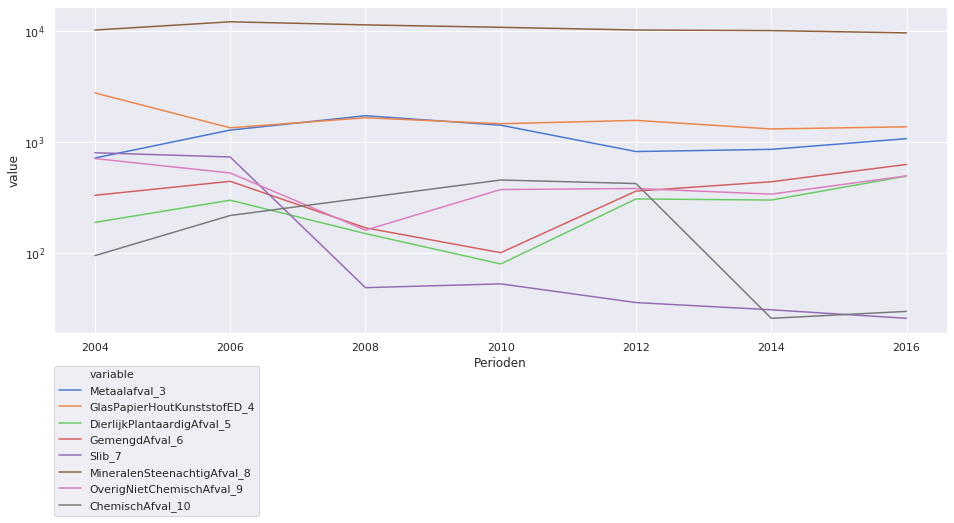

In [6]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,6))
plot = sns.lineplot(x='Perioden', y='value', hue='variable', 
             data=df_melted, palette='muted')
plot.set(yscale="log")
plt.legend(bbox_to_anchor=(0, -0.1), loc=2, borderaxespad=0.);


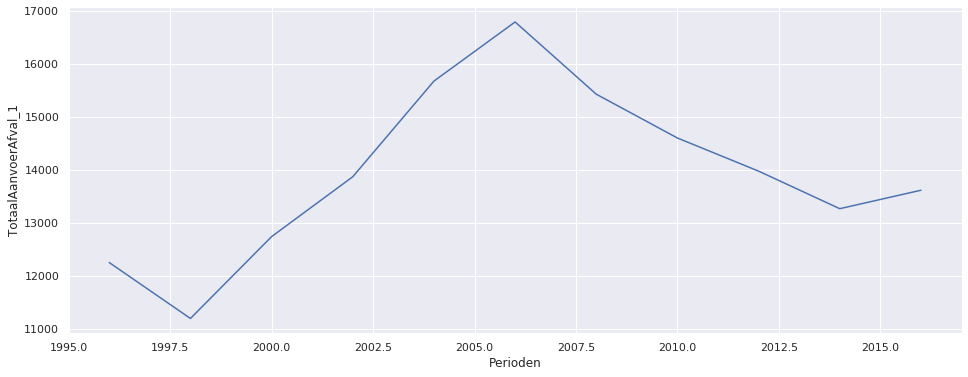

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,6))
plot = sns.lineplot(x='Perioden', y='TotaalAanvoerAfval_1',
             data=df, palette='muted')

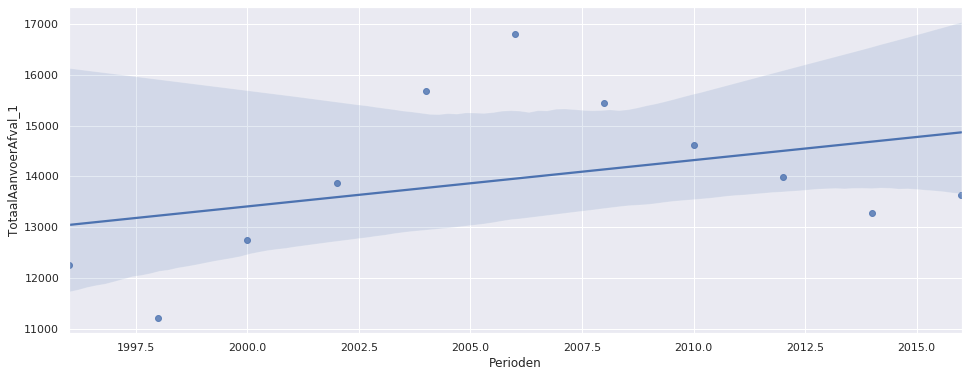

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,6))
plot = sns.regplot(x='Perioden', y='TotaalAanvoerAfval_1',
             data=df)

In [9]:
df_burn_recycle = pd.melt(df, ['Perioden'], ['NuttigeToepassing_14', 'Verbranden_15'])
df_burn_recycle

,Perioden,variable,value
0,1996,NuttigeToepassing_14,87
1,1998,NuttigeToepassing_14,246
2,2000,NuttigeToepassing_14,201
3,2002,NuttigeToepassing_14,235
4,2004,NuttigeToepassing_14,210
5,2006,NuttigeToepassing_14,121
6,2008,NuttigeToepassing_14,469
7,2010,NuttigeToepassing_14,358
8,2012,NuttigeToepassing_14,472
9,2014,NuttigeToepassing_14,629


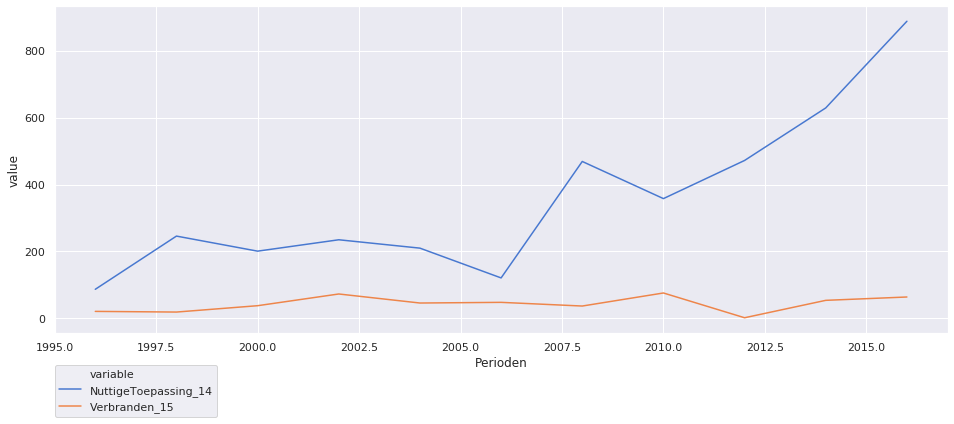

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,6))
plot = sns.lineplot(x='Perioden', y='value', hue='variable', 
             data=df_burn_recycle, palette='muted')
plt.legend(bbox_to_anchor=(0, -0.1), loc=2, borderaxespad=0.);
